In [1]:
#imports libraries that will be utilized
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import requests
import scipy.stats as sts
import scipy as spy
import scipy.integrate as integrate

QUESTION 1


Literal a:

In [19]:
#produces descriptive variables
dt1=np.loadtxt('clms.txt')
dt1mean=np.mean(dt1)
dt1median=np.median(dt1)
dt1max=np.max(dt1)
dt1min=np.min(dt1)
dt1stdev=np.std(dt1)
print('Mean = USD',dt1mean)
print('Median = USD',dt1median)
print('Maximum = USD',dt1max)
print('Minimum = USD',dt1min)
print('Standard Deviation = USD',dt1stdev)

Mean = USD 720.2779753272437
Median = USD 172.21
Maximum = USD 227967.25
Minimum = USD 0.01
Standard Deviation = USD 3972.663756393663


Histogram 1: 1000 bins


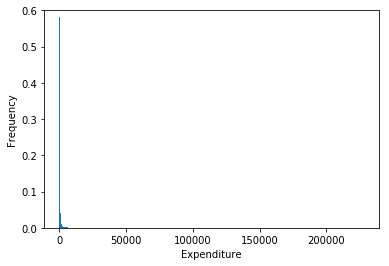

In [3]:
#produces histogram
count, bins, ignored=plt.hist(x=dt1,bins=1000, weights=(1/len(dt1))*np.ones_like(dt1))
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.ylim(0,0.6);
print('Histogram 1: 1000 bins')

Histogram 1: 100 bins


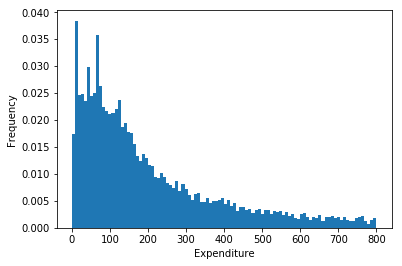

In [4]:
#produces second histogram

count, bins, ignored=plt.hist(dt1[dt1<=800],bins=100, weights=(1/len(dt1))*np.ones_like(dt1[dt1<=800]))
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
print('Histogram 1: 100 bins')

The second histogram better reflects the granularity of the health cost data where it is concentrated, so that it facilitates percieving and understanding the variations.

Literal b):

In [5]:
#Defines new criteria for gamma distribution
def crit(params, args):
    alpha, beta = params
    dt = args
    log_lik_val = sts.gamma.logpdf(x=dt, a=alpha, scale=beta)
    neg_log_lik_val = -np.mean(log_lik_val)
    
    return neg_log_lik_val

In [6]:
#Optimizes parameters and reports estimates

import scipy.optimize as opt

beta_0 = np.var(dt1)/dt1mean
alpha_0 = dt1mean/beta_0
params_0=np.array([alpha_0, beta_0])
mle_args=dt1
results_uncstr = opt.minimize(crit, params_0, args=(mle_args),method='L-BFGS-B')
alpha_MLE, beta_MLE = results_uncstr.x
print('alpha_MLE=', alpha_MLE) 
print('beta_MLE=', beta_MLE)


alpha_MLE= 0.22175531725541817
beta_MLE= 21911.064699455223


In [7]:
#prints loglikelihood
likGA = -crit(np.array([alpha_MLE,beta_MLE]),dt1)
print('Max(Loglikelihood) is ',likGA)

Max(Loglikelihood) is  -7.729207232854448


Histogram 1: 1000 bins (Better appreciate the fitting)


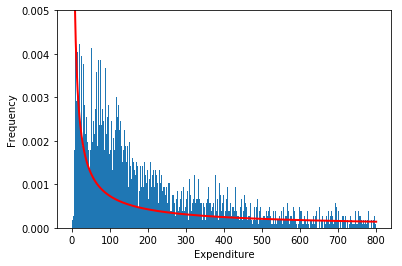

In [8]:
#produces plots combining histogram and estimated distribution. Histogram modified to 1000 bins.
dist_pts = np.linspace(dt1min,800, 1000)
count, bins, ignored=plt.hist(dt1[dt1<=800],bins=1000, weights=(1/len(dt1))*np.ones_like(dt1[dt1<=800]))
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.ylim(0,0.005);

plt.plot(dist_pts, sts.gamma.pdf(x=dist_pts,a=alpha_MLE, scale=beta_MLE),
         linewidth=2, color='r')

print('Histogram 1: 1000 bins (Better appreciate the fitting)')

Literal c)

/Users/Daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/Users/Daniel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


alpha_MLE_GG= 2.0003596453524892
beta_MLE_GG= 0.007146085236548586
m_MLE_GG= 0.21452487145015225
Max(Loglikelihood) is  -7.069184950124146


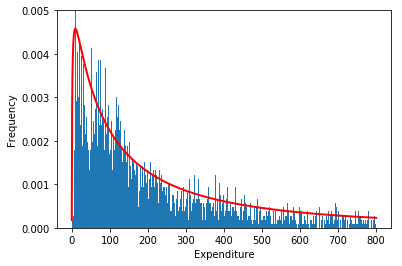

In [9]:
#Repeates process conducted in b) for the Generalized Gamma distribution
def crit2(params, args):
    alpha, beta,m = params
    dt = args
    log_lik_val = np.log(m)+(alpha-1)*np.mean(np.log(dt))-np.mean((dt/beta)**m)-alpha*np.log(beta)-np.log(spy.special.gamma(alpha/m))
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

import scipy.optimize as opt

alpha_02 = alpha_MLE
beta_02 = beta_MLE
m_02=1
params_02=np.array([alpha_02, beta_02,m_02])
mle_args2=dt1
results_uncstr = opt.minimize(crit2, params_02, args=(mle_args2),method='Nelder-Mead')
alpha_MLE_GG, beta_MLE_GG,m_GG = results_uncstr.x
print('alpha_MLE_GG=', alpha_MLE_GG) 
print('beta_MLE_GG=', beta_MLE_GG) 
print('m_MLE_GG=', m_GG)

likGG = -crit2(np.array([alpha_MLE_GG,beta_MLE_GG,m_GG]),dt1)
print('Max(Loglikelihood) is ',likGG)

dist_pts = np.linspace(dt1min,800, 1000)
count, bins, ignored=plt.hist(dt1[dt1<=800],bins=1000, weights=(1/len(dt1))*np.ones_like(dt1[dt1<=800]))
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.ylim(0,0.005);

def functionGG(point,paramsGG):
    alpha, beta,m = paramsGG
    dt=point
    log_lik_val = np.log(m)+(alpha-1)*np.log(dt)-((dt/beta)**m)-alpha*np.log(beta)-np.log(spy.special.gamma(alpha/m))
    prob=np.exp(log_lik_val)
    return prob


plt.plot(dist_pts, functionGG(dist_pts,[alpha_MLE_GG, beta_MLE_GG,m_GG]),
         linewidth=2, color='r')

Literal d):

a_MLE_GB2= 0.10514730424086458
b_MLE_GB2= 3412016790014961.0
p_MLE_GB2= 40.88759619753206
q_MLE_GB2 1003.0570458623204
Max(Loglikelihood) is  -7.054961157961948


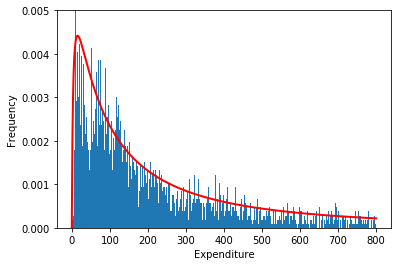

In [10]:
#Repeates process conducted in b) for the Generalized Beta distribution
def crit3(params, args):
    a,b,p,q = params
    dt = args
    log_lik_val = np.log(a)+((a*p)-1)*np.mean(np.log(dt))-(a*p)*np.log(b)-np.log(spy.special.beta(p,q))-(p+q)*np.mean(np.log(1+((dt/b)**a)))
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

import scipy.optimize as opt

q_03 = 10000
a_03 = m_GG
b_03 = beta_MLE_GG*(q_03**(1/m_GG))
p_03 = alpha_MLE_GG/m_GG

params_03=np.array([a_03, b_03,p_03,q_03])
mle_args3=dt1
results_uncstr = opt.minimize(crit3, params_03, args=(mle_args3),method='Nelder-Mead')
a_MLE_GB2, b_MLE_GB2,p_MLE_GB2, q_MLE_GB2 = results_uncstr.x
print('a_MLE_GB2=', a_MLE_GB2) 
print('b_MLE_GB2=', b_MLE_GB2) 
print('p_MLE_GB2=', p_MLE_GB2) 
print('q_MLE_GB2',q_MLE_GB2)

likGB2 = -crit3(np.array([a_MLE_GB2,b_MLE_GB2,p_MLE_GB2,q_MLE_GB2]),dt1)
print('Max(Loglikelihood) is ',likGB2)

dist_pts = np.linspace(dt1min,800, 1000)
count, bins, ignored=plt.hist(dt1[dt1<=800],bins=1000, weights=(1/len(dt1))*np.ones_like(dt1[dt1<=800]))
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.ylim(0,0.005);

def functionGB2(point,paramsGB2):
    a,b,p,q = paramsGB2
    dt=point
    log_lik_val = np.log(a)+((a*p)-1)*np.log(dt)-(a*p)*np.log(b)-np.log(spy.special.beta(p,q))-(p+q)*np.log(1+((dt/b)**a))
    return np.exp(log_lik_val)


plt.plot(dist_pts, functionGB2(dist_pts,[a_MLE_GB2,b_MLE_GB2,p_MLE_GB2,q_MLE_GB2]),
         linewidth=2, color='r')

Literal e):

Recall:
Log-likelihoods 

In [11]:
#Provides easy access to Log-likelihood values
print ('Log-likelihood GA',likGA)
print ('Log-likelihood GG',likGG)
print ('Log-likelihood GB2',likGB2)

Log-likelihood GA -7.729207232854448
Log-likelihood GG -7.069184950124146
Log-likelihood GB2 -7.054961157961948


In [12]:
#Calculates p-values for GA and GG distributions
pvalGA=1-sts.chi2.cdf(len(dt1)*2*(likGB2-likGA),4)
pvalGG=1-sts.chi2.cdf(len(dt1)*2*(likGB2-likGG),4)


In [13]:
print('GA p-val',pvalGA)
print('GG p-val',pvalGG)

GA p-val 0.0
GG p-val 0.0


Literal f):

In [14]:
#Calculates probabilities that of HealthCare claim surpassing USD $1000 for GB2 and GA distributions. 
REMCumprobClaimGB2 = integrate.quad(lambda x: functionGB2(x,np.array([a_MLE_GB2,b_MLE_GB2,p_MLE_GB2,q_MLE_GB2])), 0, 1000)
probwGB2=1 - REMCumprobClaimGB2[0]
probwGA=1-sts.gamma.cdf(x=1000,a=alpha_MLE, scale=beta_MLE)


In [15]:
print('Probability with GB2',probwGB2)
print('Probability with GA',probwGA)

Probability with GB2 0.1328242954292591
Probability with GA 0.45195973591695326


QUESTION 2

Literal a)

In [16]:
dt2=pd.read_csv('MacroSeries.txt',sep=",",header=None)
dt2.columns=["c","k","w","r"]
betaq2=0.99
alphaq2_0=1/2
rho_0=1/2
mu_0=1/2
sigma_0=1/2

#function that calculates the z straight from the data based on equation 3.
def function3z(al,wt,kt):
    zt=np.log(wt)-np.log(1-al)-al*np.log(kt)
    return zt
#defines the criteria for estimating z(t+1)
def critQ2a(paramsa,dt2):
    al,rho,mu,sigma = paramsa
    zt=function3z(al,dt2['w'],dt2['k'])
    zt1=zt.shift(1)
    log_like_fun=-np.log(sigma)-0.5*np.log(2*np.pi)-(zt-(rho*zt1+(1-rho)*mu))**2 / (2 * sigma**2)
    return -np.mean(log_like_fun)

params2_0=np.array([alphaq2_0,rho_0,mu_0,sigma_0])

#conducts optimization and reports estimated parameters
results_uncstraa = opt.minimize(critQ2a,params2_0,dt2,method='L-BFGS-B',bounds=((1e-10, 0.99), (1e-10, 0.99),(1e-10, None), (1e-10, None)))
al_a, rho_a,mu_a, sigma_a = results_uncstraa.x
print('Alpha',al_a)
print('Rho',rho_a)
print('Mu',mu_a)
print('Sigma',sigma_a)

hessa = results_uncstraa.hess_inv.todense()
print('Inverse Hessian ', hessa)


Alpha 0.4625659164251777
Rho 0.7168877629454845
Mu 9.453444297977446
Sigma 0.09245351624281299
Inverse Hessian  [[ 4.75506929e+01 -6.14234220e+01 -6.77256665e+02  4.45905783e-01]
 [-6.14234220e+01  8.24271393e+01  8.75820903e+02 -6.24264178e-01]
 [-6.77256665e+02  8.75820903e+02  9.64663835e+03 -6.37129841e+00]
 [ 4.45905783e-01 -6.24264178e-01 -6.37129841e+00  9.68928140e-03]]


Literal b)

In [17]:
def function4z(al,rt,kt):
    zt=np.log(rt)-np.log(al)-(al-1)*np.log(kt)
    return zt

def critQ2b(paramsa,dt2):
    al,rho,mu,sigma = paramsa
    zt=function4z(al,dt2['r'],dt2['k'])
    zt1=zt.shift(1)
    log_like_fun=-np.log(sigma)-0.5*np.log(2*np.pi)-(zt-(rho*zt1+(1-rho)*mu))**2 / (2 * sigma**2)
    return -np.mean(log_like_fun)

params2_0=np.array([alphaq2_0,rho_0,mu_0,sigma_0])

#conducts optimization and reports estimated parameters
results_uncstrbb = opt.minimize(critQ2b,params2_0,dt2,method='L-BFGS-B',bounds=((1e-10, 0.99), (1e-10, 0.99),(1e-10, None), (1e-10, None)))
al_b, rho_b,mu_b, sigma_b = results_uncstrbb.x
print('Alpha',al_b)
print('Rho',rho_b)
print('Mu',mu_b)
print('Sigma',sigma_b)

hessb = results_uncstrbb.hess_inv.todense()
print('Inverse Hessian ', hessb)

Alpha 0.7167272194611425
Rho 0.4627713530613314
Mu 4.82314944807095
Sigma 0.09245228591603005
Inverse Hessian  [[ 3.93075915e+01 -5.38167674e+01 -6.44761814e+02 -2.48995723e+00]
 [-5.38167674e+01  7.51250701e+01  8.83593970e+02  3.41370037e+00]
 [-6.44761814e+02  8.83593970e+02  1.05821454e+04  4.05355261e+01]
 [-2.48995723e+00  3.41370037e+00  4.05355261e+01  1.80771429e-01]]


Literal c)

In [18]:
#calculates z prime and the probability based on parameters estimated in question 2a.
ktc=10000000
rtc=1
zprime=np.log(rtc)-np.log(al_a)-(al_a-1)*np.log(ktc)
zmean=rho_a*10+(1-rho_a)*mu_a
probz=1-sts.norm.cdf(x=zprime,loc=zmean,scale=sigma_a)
print('z*=',zprime)
print('Probability =',probz)


z*= 9.433380175328683
Probability = 0.9999958059328472
